# Tagging the Whole Tree (AST) for Progol

This extends ILP-joern-ey-into-progol scripts to include the tree each node is in, in the ILP facts.

## Generating Progol
In this section we load in the ILP dataset and its Progol representations, manually find the "error" node in each example, then define the `make_progol_script` function which will generate a script from the given testcase id's.

In [1]:
import pandas as pd

In [2]:
import tempfile
import subprocess
import graph_visualisation

In [3]:
ilp_data = pd.read_csv("../data/ilp_dataset.csv.gz")
ilp_data = ilp_data.drop("Unnamed: 0", axis=1)
ilp_data.head()

,testcase_ID,filename,code,flaw,flaw_loc,bug,code_length
0,62804,000/062/804/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,33,False,1722
1,62821,000/062/821/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,35,False,1808
2,62852,000/062/852/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,30,False,1674
3,62853,000/062/853/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,33,False,2396
4,62854,000/062/854/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,33,False,2414


In [4]:
prolog = pd.read_csv("../data/ilp_prolog_data.csv.gz")
prolog = prolog.drop("Unnamed: 0", axis=1)
prolog.head()

,testcase_ID,flaw,bug,code_length,tree,source_map
0,-232086,CWE-122,True,1625,% START: Generated Prolog\n% NODE PROPERTIES \...,"% CODE\nsource_code(bad_232086_id_1_f_l_c_, ""p..."
1,-232012,CWE-122,True,1619,% START: Generated Prolog\n% NODE PROPERTIES \...,"% CODE\nsource_code(bad_232012_id_0_f_l_c_, ""p..."
2,-62917,CWE-121,True,1622,% START: Generated Prolog\n% NODE PROPERTIES \...,"% CODE\nsource_code(bad_62917_id_0_f_l_c_, ""p1..."
3,-62916,CWE-121,True,1649,% START: Generated Prolog\n% NODE PROPERTIES \...,"% CODE\nsource_code(bad_62916_id_1_f_l_c_, ""p1..."
4,-62915,CWE-121,True,1638,% START: Generated Prolog\n% NODE PROPERTIES \...,"% CODE\nsource_code(bad_62915_id_0_f_l_c_, ""p1..."


In [5]:
juliet = pd.read_csv("../data/buffer_overflow_data.csv.gz")
juliet.drop("Unnamed: 0", axis=1)
juliet.head()

,Unnamed: 0,Unnamed: 0.1,testcase_ID,filename,code,flaw,flaw_loc,bug
0,984,984,62516,000/062/516/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,112,False
1,985,985,62517,000/062/517/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,117,False
2,986,986,62518,000/062/518/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,117,False
3,987,987,62519,000/062/519/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,123,False
4,988,988,62520,000/062/520/CWE121_Stack_Based_Buffer_Overflow...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,CWE-121,123,False


In [6]:
prolog['source_code'] = ''
prolog['flaw_loc'] = 0
prolog['bad_code'] = ''

In [7]:
for i in range(len(prolog)):
    label = prolog.iloc[i].testcase_ID == juliet.testcase_ID
    prolog['source_code'].iloc[i] = juliet.loc[label].iloc[0].code
    prolog['flaw_loc'].iloc[i] = juliet.loc[label].iloc[0].flaw_loc
    

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
for i in range(len(prolog)):
    loc =  prolog.iloc[i].flaw_loc
    testcase_ID = prolog.iloc[i].testcase_ID
    if testcase_ID < 0:
        prolog['bad_code'].iloc[i] = prolog.iloc[i].source_code.split('\n')[loc-1].strip()[0:-1]
    else:
        prolog['bad_code'].iloc[i] = prolog.loc[prolog.testcase_ID == -testcase_ID].iloc[0].bad_code

In [9]:
prolog.head()

,testcase_ID,flaw,bug,code_length,tree,source_map,source_code,flaw_loc,bad_code
0,-232086,CWE-122,True,1625,% START: Generated Prolog\n% NODE PROPERTIES \...,"% CODE\nsource_code(bad_232086_id_1_f_l_c_, ""p...",/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,31,"memmove(data, source, 10*sizeof(int))"
1,-232012,CWE-122,True,1619,% START: Generated Prolog\n% NODE PROPERTIES \...,"% CODE\nsource_code(bad_232012_id_0_f_l_c_, ""p...",/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,31,"memcpy(data, source, 10*sizeof(int))"
2,-62917,CWE-121,True,1622,% START: Generated Prolog\n% NODE PROPERTIES \...,"% CODE\nsource_code(bad_62917_id_0_f_l_c_, ""p1...",/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,32,"memmove(data, source, 10*sizeof(int))"
3,-62916,CWE-121,True,1649,% START: Generated Prolog\n% NODE PROPERTIES \...,"% CODE\nsource_code(bad_62916_id_1_f_l_c_, ""p1...",/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,34,"memmove(data, source, 10*sizeof(int))"
4,-62915,CWE-121,True,1638,% START: Generated Prolog\n% NODE PROPERTIES \...,"% CODE\nsource_code(bad_62915_id_0_f_l_c_, ""p1...",/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,34,"memmove(data, source, 10*sizeof(int))"


In [10]:
good_examples = prolog[prolog['bug'] == False]
bad_examples = prolog[prolog['bug'] == True]

In [11]:
good_examples.head()

,testcase_ID,flaw,bug,code_length,tree,source_map,source_code,flaw_loc,bad_code
20,62804,CWE-121,False,1722,% START: Generated Prolog\n% NODE PROPERTIES \...,"% CODE\nsource_code(good_62804_id_1_f_l_c_, ""p...",/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,33,data[i] = source[i]
21,62821,CWE-121,False,1808,% START: Generated Prolog\n% NODE PROPERTIES \...,% CODE\nsource_code(good_62821_id_1_f_l_58_c_1...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,35,data[i] = source[i]
22,62852,CWE-121,False,1674,% START: Generated Prolog\n% NODE PROPERTIES \...,"% CODE\nsource_code(good_62852_id_0_f_l_c_, ""p...",/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,30,"memcpy(data, source, 10*sizeof(int))"
23,62853,CWE-121,False,2396,% START: Generated Prolog\n% NODE PROPERTIES \...,"% CODE\nsource_code(good_62853_id_1_f_l_c_, ""p...",/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,33,"memcpy(data, source, 10*sizeof(int))"
24,62854,CWE-121,False,2414,% START: Generated Prolog\n% NODE PROPERTIES \...,"% CODE\nsource_code(good_62854_id_1_f_l_c_, ""p...",/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,33,"memcpy(data, source, 10*sizeof(int))"


In [12]:
def extract_node_ids(tree):
    nodes = set()
    
    in_ast_section = False
    
    for line in tree.split('\n'):
        line = line.strip()
        
        if line == '% AST':
            in_ast_section = True
        
        if line == '% CFG':
            in_ast_section = False
            
        if line == '% REF':
            in_ast_section = False
        
        if in_ast_section and not line.startswith("%"):
            parent, child = line[4:-2].split(", ")
            nodes.add(parent)
            nodes.add(child)
            
    return nodes

In [13]:
# good nodes_g
nodes_g = set()

for i in range(len(good_examples)):
    good_nodes = extract_node_ids(good_examples.iloc[i].tree)
    nodes_g = set.union(nodes_g,good_nodes)

    
# bad nodes_b
nodes_b = set()

for i in range(len(bad_examples)):
    bad_nodes = extract_node_ids(bad_examples.iloc[i].tree)
    nodes_b = set.union(nodes_b,bad_nodes)

nodes = set.union(nodes_g,nodes_b)

In [14]:
node_and_tree = []
for node in nodes:
    start, end = node.split('_id')
    node_and_tree.append('(' +start+ ', ' +node+ ')')

node_and_tree[0:5]

['(good_62902, good_62902_id_220_f_l_34_c_)',
 '(good_62902, good_62902_id_171_f_l_46_c_0_)',
 '(bad_62821, bad_62821_id_18_f_l_c_)',
 '(good_62804, good_62804_id_90_f_loop_01_c_l_62_c_4_)',
 '(bad_62917, bad_62917_id_20_f_l_c_)']

In [15]:
def extract_tree_ids(tree):
    line = tree.split('\n')[2]
    line = line.strip()
    line = line.split('(')[1]
    tree_id = line.split('_id')[0]

    return tree_id

In [16]:
tree_ids = []
for tree in prolog.tree:
    tree_ids.append(extract_tree_ids(tree))

In [17]:
trees = [
    'tree('+ tree_label +').' for tree_label in tree_ids
]

In [18]:
bad_node = []
good_node = []

for tree in tree_ids:
    if tree[0:3] == 'bad':
        bad_node.append(tree)
    else:
        good_node.append(tree)

In [19]:
good_node

['good_62804',
 'good_62821',
 'good_62852',
 'good_62853',
 'good_62854',
 'good_62861',
 'good_62865',
 'good_62867',
 'good_62868',
 'good_62869',
 'good_62900',
 'good_62901',
 'good_62902',
 'good_62909',
 'good_62913',
 'good_62915',
 'good_62916',
 'good_62917',
 'good_232012',
 'good_232086']

In [20]:
node_tree_types = [
    'node'+ node_tree +'.' for node_tree in node_and_tree
]

tree_positive_examples = [
    'bug('+node_id+').' for node_id in bad_node
]

tree_negative_examples = [
    ':- bug('+node_id+').' for node_id in good_node
]

In [21]:
def make_progol_script_tag_whole_tree(header, testcases):
    script_template = """
{header}

%%Trees
{trees}

%% Types
{types}

%% background knowledge
{bg_knowledge}

%% learning task
%% positive examples
{positive_examples}

%% negative examples
{negative_examples}

    """
    script = script_template.format(
        header = header,
        trees =  '\n'.join(trees),
        types = '\n'.join(node_tree_types),
        bg_knowledge = '\n'.join(prolog['tree']),
        positive_examples='\n'.join(tree_positive_examples),
        negative_examples='\n'.join(tree_negative_examples),
    )
    
    # remove all lines not related to this testcase
    script = '\n'.join([
        line for line in script.split("\n")  if any(
            str(testcase) in line for testcase in testcases
        ) or not ("good_" in line or "bad_" in line)
    ])
    
    return script

## Experimentation
In this section we try different subsets of the dataset with different Progol settings. 

We take the final result from the previous notebook and run it with the new tagged trees.

In [22]:
header = """
% Settings
:- set(c,5)?
:- set(i,30)?
:- set(h,500)?
:- set(inflate,500)?

% Mode declarations
:- modeh(*, bug(+tree))?

:- modeb(*, node(+tree,-node))?

:- modeb(*, ref(+node,-node))?
:- modeb(*, ref(-node,+node))?

:- modeb(*, sizeOf(+node))?
:- modeb(*, malloc(+node))?
:- modeb(*, alloc(+node))?
:- modeb(*, writeToPointer(+node))?
:- modeb(*, ancestor(+node, -node))?
:- modeb(*, ancestor(-node, +node))?
:- modeb(*, ast(+node, -node))?

ancestor(A,C) :- ast(A,B), ancestor(B,C).
ancestor(A,C) :- ast(A,B), ast(B,C).

writeToPointer(A) :- ast(A, B), assignment(A), compMemberAccess(B). 

"""

script = make_progol_script_tag_whole_tree(header, {
    62804,
    62852,
    62853,
    62854,
    62869,
    62900,
    62901,
    62917,
    232012,
    232086,
})

with open("/tmp/progol_input.pl", "w") as f:
    f.write(script)

!/progol/source/progol /tmp/progol_input.pl

CProgol Version 5.0

[:- set(c,5)? - Time taken 0.00s]
[:- set(i,30)? - Time taken 0.00s]
[:- set(h,500)? - Time taken 0.00s]
[:- set(inflate,500)? - Time taken 0.00s]
[:- modeh(100,bug(+tree))? - Time taken 0.00s]
[:- modeb(100,node(+tree,-node))? - Time taken 0.00s]
[:- modeb(100,ref(+node,-node))? - Time taken 0.00s]
[:- modeb(100,ref(-node,+node))? - Time taken 0.00s]
[:- modeb(100,sizeOf(+node))? - Time taken 0.00s]
[:- modeb(100,malloc(+node))? - Time taken 0.00s]
[:- modeb(100,alloc(+node))? - Time taken 0.00s]
[:- modeb(100,writeToPointer(+node))? - Time taken 0.00s]
[:- modeb(100,ancestor(+node,-node))? - Time taken 0.00s]
[:- modeb(100,ancestor(-node,+node))? - Time taken 0.00s]
[:- modeb(100,ast(+node,-node))? - Time taken 0.00s]
[Testing for contradictions]
[No contradictions found]
[Generalising bug/1]
[Generalising bug(bad_232086).]
[Generalising <bug(bad_232086).>]
^C


Fails to generalise.

## Root Nodes

Since the above fails to generalise, we attempt a simpler approach. Instead of tagging the node where the buffer overflow takes place as the bug, we tag the root.

In [23]:
def find_root_node(tree, nodes):
    """
    Given a <tree_id> e.g. bad_62804 and the list of all node ids, <nodes>, return the root node of the 
    """
    tree_nodes = [node for node in nodes if tree in node]
    
    # root node of each tree seems to be the one with the largest id
    max_id = 0
    root_node = None
    
    for node in tree_nodes:
        node_id = int(node.split("_")[3])
        if node_id >= max_id:
            max_id = node_id
            root_node = node
            
    return root_node

In [24]:
root_nodes = [find_root_node(tree, nodes) for tree in tree_ids]
root_nodes[0:5]

['bad_232086_id_185_f_l_c_',
 'bad_232012_id_185_f_l_c_',
 'bad_62917_id_151_f_l_c_',
 'bad_62916_id_174_f_l_c_',
 'bad_62915_id_153_f_l_c_']

In [25]:
root_positive_examples = [
    "bug(" + node + ").\n" for node in root_nodes if 'bad' in node
]
root_negative_examples = [
    ":- bug("+ node + ").\n" for node in root_nodes if 'good' in node
]

In [26]:
def make_progol_script_tag_whole_tree_root_bug(header, testcases):
    script_template = """
{header}

%%Trees
{trees}

%% Types
{types}

%% background knowledge
{bg_knowledge}

%% learning task
%% positive examples
{positive_examples}

%% negative examples
{negative_examples}

    """
    script = script_template.format(
        header = header,
        trees =  '\n'.join(trees),
        types = '\n'.join(node_tree_types),
        bg_knowledge = '\n'.join(prolog['tree']),
        positive_examples='\n'.join(root_positive_examples),
        negative_examples='\n'.join(root_negative_examples),
    )
    
    # remove all lines not related to this testcase
    script = '\n'.join([
        line for line in script.split("\n")  if any(
            str(testcase) in line for testcase in testcases
        ) or not ("good_" in line or "bad_" in line)
    ])
    
    return script

In [27]:
header = """
% Settings
:- set(c,3)?
:- set(i,3)?
:- set(h,500)?
:- set(cover)?
:- set(inflate,1500)?

% Mode declarations
:- modeh(*, bug(+node))?

:- modeb(*, ref(+node,-node))?
:- modeb(*, ref(-node,+node))?

:- modeb(*, sizeOf(+node))?
:- modeb(*, alloc(+node))?
:- modeb(*, writeToPointer(+node))?
:- modeb(*, alloc_doesnt_check_sizeOf(+node))?
:- modeb(*, ancestor(+node, -node))?
:- modeb(*, ancestor(-node, +node))?
%:- modeb(*, runs_before(+node, -node))?

writeToPointer(A) :- ast(A, B), assignment(A), compMemberAccess(B). 

contains_sizeOf_call(A) :- ancestor(A, B), sizeof(B).
alloc_doesnt_check_sizeOf(A) :- alloc(A), not(contains_sizeOf_call(A)).

ancestor(A,C) :- ast(A,B), ancestor(B,C).
ancestor(A,C) :- ast(A,B), ast(B,C).

%runs_before(A,C) :- cfg(A,B), runs_before(B,C).
%runs_before(A,C) :- cfg(A,B), cfg(B,C).
"""

testcases = {
    62852, 62900, 62869, 62804, 232012, 62853, 62917, 232086, 62901, 62854, 62867, 62902, 62915, 62868, 62861, 62916, 62909, 62865, 62913, 62821
}

script = make_progol_script_tag_whole_tree_root_bug(
    header,
    testcases
)

with open("/tmp/progol_input.pl", "w") as f:
    f.write(script)

!/progol/source/progol /tmp/progol_input.pl

CProgol Version 5.0

[:- set(c,3)? - Time taken 0.00s]
[:- set(i,3)? - Time taken 0.00s]
[:- set(h,500)? - Time taken 0.00s]
[The cover flag has been turned ON]
[:- set(cover)? - Time taken 0.00s]
[:- set(inflate,1500)? - Time taken 0.00s]
[:- modeh(100,bug(+node))? - Time taken 0.00s]
[:- modeb(100,ref(+node,-node))? - Time taken 0.00s]
[:- modeb(100,ref(-node,+node))? - Time taken 0.00s]
[:- modeb(100,sizeOf(+node))? - Time taken 0.00s]
[:- modeb(100,alloc(+node))? - Time taken 0.00s]
[:- modeb(100,writeToPointer(+node))? - Time taken 0.00s]
[:- modeb(100,alloc_doesnt_check_sizeOf(+node))? - Time taken 0.00s]
[:- modeb(100,ancestor(+node,-node))? - Time taken 0.00s]
[:- modeb(100,ancestor(-node,+node))? - Time taken 0.00s]
[Testing for contradictions]
[No contradictions found]
[Generalising bug/1]
[Generalising bug(bad_232086_id_185_f_l_c_).]
[Generalising <bug(bad_232086_id_185_f_l_c_).>]
bug(A) :- ref(A,B), ancestor(A,C), ancestor(A,D), ancestor(A,E), ancestor(A,F), ancestor(A,G), 

bug(A) :- ref(A,B), ancestor(A,C), ancestor(A,D), ancestor(A,E), ancestor(A,F), ancestor(A,G), ancestor(A,H), ancestor(A,I), ancestor(A,J), ancestor(A,K), ancestor(A,L), ancestor(A,M), ancestor(A,N), ancestor(A,O), ancestor(A,P), ancestor(A,Q), ancestor(A,R), ancestor(A,S), ancestor(A,T), ancestor(A,U), ancestor(A,V), ancestor(A,W), ancestor(A,X), ancestor(A,Y), ancestor(A,Z), ancestor(A,A0), ancestor(A,B0), ancestor(A,C0), ancestor(A,D0), ancestor(A,E0), ancestor(A,F0), ancestor(A,G0), ancestor(A,H0), ancestor(A,I0), ancestor(A,J0), ancestor(A,K0), ancestor(A,L0), ancestor(A,M0), ancestor(A,N0), ancestor(A,O0), ancestor(A,P0), ancestor(A,Q0), ancestor(A,R0), ancestor(A,S0), ancestor(A,T0), ancestor(A,U0), ancestor(A,V0), ancestor(A,W0), ancestor(A,X0), ancestor(A,Y0), ancestor(A,Z0), ancestor(A,A1), ancestor(A,B1), ancestor(A,C1), ancestor(A,D1), ancestor(A,E1), ancestor(A,F1), ref(G1,B), ancestor(G1,H1), ancestor(G1,I1), ancestor(G1,J1), ancestor(G1,K1), ancestor(G1,L1), ancestor(G1,

bug(A) :- ref(A,B), ancestor(A,C), ancestor(A,D), ancestor(A,E), ancestor(A,F), ancestor(A,G), ancestor(A,H), ancestor(A,I), ancestor(A,J), ancestor(A,K), ancestor(A,L), ancestor(A,M), ancestor(A,N), ancestor(A,O), ancestor(A,P), ancestor(A,Q), ancestor(A,R), ancestor(A,S), ancestor(A,T), ancestor(A,U), ancestor(A,V), ancestor(A,W), ancestor(A,X), ancestor(A,Y), ancestor(A,Z), ancestor(A,A0), ancestor(A,B0), ancestor(A,C0), ancestor(A,D0), ancestor(A,E0), ancestor(A,F0), ancestor(A,G0), ancestor(A,H0), ancestor(A,I0), ancestor(A,J0), ancestor(A,K0), ancestor(A,L0), ancestor(A,M0), ancestor(A,N0), ancestor(A,O0), ancestor(A,P0), ancestor(A,Q0), ancestor(A,R0), ancestor(A,S0), ancestor(A,T0), ancestor(A,U0), ancestor(A,V0), ancestor(A,W0), ancestor(A,X0), ancestor(A,Y0), ancestor(A,Z0), ancestor(A,A1), ancestor(A,B1), ancestor(A,C1), ancestor(A,D1), ancestor(A,E1), ancestor(A,F1), ref(G1,B), ancestor(G1,H1), ancestor(G1,I1), ancestor(G1,J1), ancestor(G1,K1), ancestor(G1,L1), ancestor(G1,

[C:278,300,20,0 bug(A) :- ancestor(A,B).]
[3 explored search nodes]
f=279,p=300,n=20,h=0
[No compression]

[Generalising bug(bad_62867_id_153_f_l_c_).]
[Generalising <bug(bad_62867_id_153_f_l_c_).>]
bug(A) :- ref(A,B), ancestor(A,C), ancestor(A,D), ancestor(A,E), ancestor(A,F), ancestor(A,G), ancestor(A,H), ancestor(A,I), ancestor(A,J), ancestor(A,K), ancestor(A,L), ancestor(A,M), ancestor(A,N), ancestor(A,O), ancestor(A,P), ancestor(A,Q), ancestor(A,R), ancestor(A,S), ancestor(A,T), ancestor(A,U), ancestor(A,V), ancestor(A,W), ancestor(A,X), ancestor(A,Y), ancestor(A,Z), ancestor(A,A0), ancestor(A,B0), ancestor(A,C0), ancestor(A,D0), ancestor(A,E0), ancestor(A,F0), ancestor(A,G0), ancestor(A,H0), ancestor(A,I0), ancestor(A,J0), ancestor(A,K0), ancestor(A,L0), ancestor(A,M0), ancestor(A,N0), ancestor(A,O0), ancestor(A,P0), ancestor(A,Q0), ancestor(A,R0), ancestor(A,S0), ancestor(A,T0), ancestor(A,U0), ancestor(A,V0), ancestor(A,W0), ancestor(A,X0), ancestor(A,Y0), ancestor(A,Z0), ances

bug(A) :- ref(A,B), ancestor(A,C), ancestor(A,D), ancestor(A,E), ancestor(A,F), ancestor(A,G), ancestor(A,H), ancestor(A,I), ancestor(A,J), ancestor(A,K), ancestor(A,L), ancestor(A,M), ancestor(A,N), ancestor(A,O), ancestor(A,P), ancestor(A,Q), ancestor(A,R), ancestor(A,S), ancestor(A,T), ancestor(A,U), ancestor(A,V), ancestor(A,W), ancestor(A,X), ancestor(A,Y), ancestor(A,Z), ancestor(A,A0), ancestor(A,B0), ancestor(A,C0), ancestor(A,D0), ancestor(A,E0), ancestor(A,F0), ancestor(A,G0), ancestor(A,H0), ancestor(A,I0), ancestor(A,J0), ancestor(A,K0), ancestor(A,L0), ancestor(A,M0), ancestor(A,N0), ancestor(A,O0), ancestor(A,P0), ancestor(A,Q0), ancestor(A,R0), ancestor(A,S0), ancestor(A,T0), ancestor(A,U0), ancestor(A,V0), ancestor(A,W0), ancestor(A,X0), ancestor(A,Y0), ancestor(A,Z0), ancestor(A,A1), ancestor(A,B1), ancestor(A,C1), ancestor(A,D1), ancestor(A,E1), ancestor(A,F1), ref(G1,B), ancestor(G1,H1), ancestor(G1,I1), ancestor(G1,J1), ancestor(G1,K1), ancestor(G1,L1), ancestor(G1,

Gained one rule:

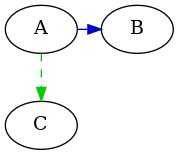

In [28]:
import graph_visualisation as gv

gv.jupyter_display_graph(gv.prolog_rule_to_dot('bug(A) :- ref(A,B), ancestor(A,C).'))